<a href="https://colab.research.google.com/github/hwon820/Python_DataAnalysis/blob/main/Chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##071. 인간관계 네트워크 가시화

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd

df_links = pd.read_csv('/content/gdrive/MyDrive/파이썬 데이터분석/pyda100-master/8장/links.csv')

Mounted at /content/gdrive


In [ ]:
df_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_links["Unnamed: 0"].unique() # 0번부터 19번까지 총 20개의 노드(20명의 데이터)

array(['Node0', 'Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6',
       'Node7', 'Node8', 'Node9', 'Node10', 'Node11', 'Node12', 'Node13',
       'Node14', 'Node15', 'Node16', 'Node17', 'Node18', 'Node19'],
      dtype=object)

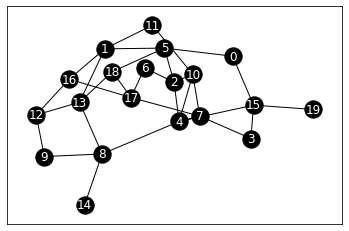

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

#그래프 객체 생성
G = nx.Graph()

#Node
NUM = len(df_links.index)
for i in range(1, NUM+1):
  node_no = df_links.columns[i].strip("Node")
  #print(node_no)
  G.add_node(str(node_no))

#Edge
for i in range(NUM):
  for j in range(NUM):
    #print(i, j)
    node_name = "Node" + str(j)

    if df_links[node_name].iloc[i] == 1:  #Node j의 i번째와의 연결 여부가 1이라면
      G.add_edge(str(i), str(j))  #edge 추가

#Drawing
nx.draw_networkx(G, node_color = "k", edge_color = "k", font_color = "w")
plt.show()  #다른 노드와 많이 연결되어 있을수록 중심에 위치

##072. 입소문에 의한 정보 전파 모습 가시화

In [ ]:
import numpy as np

#10%의 확률로 전파된다 가정
def determin_link(percent):
  rand_val = np.random.rand() #랜덤수 반환
  if rand_val <= percent:
    return 1
  else:
    return 0

# 전파 시뮬레이션 함수
# num: 사람 수, list_active: 입소문 들은 여부 표기 배열, percentag_percolation: 입소문 날 확률
def simulate_percolation(num, list_active, percent_percolation):
  for i in range(num):
    if list_active[i] == 1:         # i가 입소문을 들은 사람이고
      for j in range(num):        
        node_name = "Node" + str(j)
        if df_links[node_name].iloc[i] == 1:    # i와 연결되어 있는 Node j가
          if determin_link(percent_percolation) == 1:   # 특정 퍼센트의 확률로 입소문을 들었다면
            list_active[j] = 1                          # 입소문 들은 여부를 1로 설정

  return list_active

In [ ]:
percent_percolation = 0.1
T_NUM = 36  # 입소문 전파 기간 설정 -> 36개월
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

#시뮬레이션
list_timeSeries = []
for t in range(T_NUM):
  list_active = simulate_percolation(NUM, list_active, percent_percolation)
  list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries[t]  # [t] ???

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

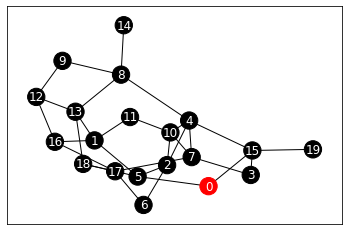

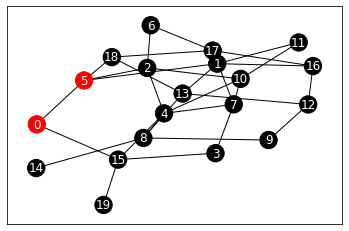

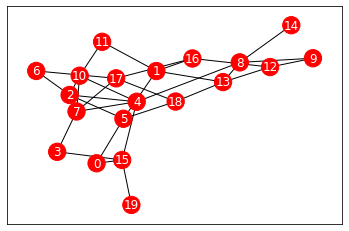

In [ ]:
#시뮬레이션 결과 시각화

def active_node_coloring(list_active):
  list_color = []
  for i in range(len(list_timeSeries[t])):

    if list_timeSeries[t][i] == 1:
      list_color.append("r")
    else:
      list_color.append("k")

  return list_color

t = 0
nx.draw_networkx(G, font_color="w", node_color = active_node_coloring(list_timeSeries[t]))
plt.show()

t = 11
nx.draw_networkx(G, font_color="w", node_color = active_node_coloring(list_timeSeries[t]))
plt.show()

t = 35
nx.draw_networkx(G, font_color="w", node_color = active_node_coloring(list_timeSeries[t]))
plt.show()

#오랜기간이 경과할수록 전원에게 전파

##073. 입소문 수의 시계열 변화 그래프화

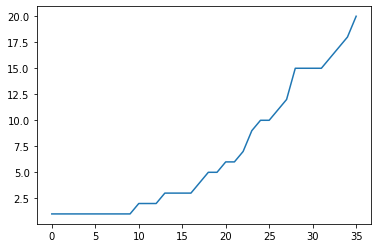

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i])) # 증가 수를 보기 위해 매단계에서 sum()

plt.plot(list_timeSeries_num)
plt.show()

##074. 회원 수의 시계열변화 시뮬레이션

In [ ]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links):
  #확산
  for i in range(num):
    if list_active[i] == 1:
      for j in range(num):
        if df_links.iloc[i][j] == 1:    # Node i와 Node j의 연결이 1이고
          if determin_link(percent_percolation) == 1:   # 특정 확률로 입소문이 전달되면
            list_active[j] = 1  
  
  #소멸
  for i in range(num):
    if determin_link(percent_disapparence) == 1:  # 특정 확률로 전달이 안 되면
      list_active[i] = 0

  return list_active

In [ ]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

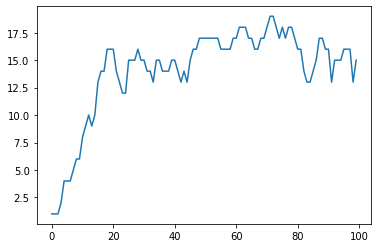

In [ ]:
#시계열 그래프 그리기
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

#증감을 반복하며 서서히 100%에 가까워짐

In [ ]:
# 소멸 확률 높인 version
percent_disapparence = 0.2
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

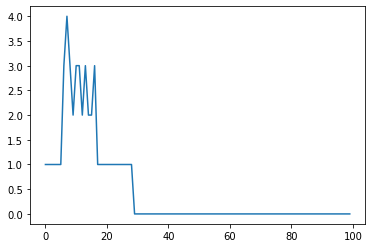

In [ ]:
# 시계열 그래프 그리기
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

##075. 파라미터 전체를 상관관계를 보면서 파악

In [ ]:
#확률과 소멸 확률 바꿔가며 파악

T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram, NUM_PhaseDiagram))   # 20X20 영행렬 생성
for i_p in range(NUM_PhaseDiagram):     
  for i_d in range(NUM_PhaseDiagram):
    # 전파 / 소멸 확률 늘려가며 반복
    percent_percolation = 0.05*i_p
    percent_disapparance = 0.05*i_d

    list_active = np.zeros(NUM)
    list_active[0] = 1
    for t in range(T_NUM):
      list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
      phaseDiagram[i_p][i_d] = sum(list_active)

print(phaseDiagram)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  3.]
 [ 0.  0.  0. 10.  0.  0. 10.  0.  0.  9.  0.  0. 14.  0.  0.  0.  0.  0.
   0.  0.]
 [12. 13.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  8.  0.  0.  5.  0.
  13. 12.]
 [13.  9. 14. 11. 10. 10. 12.  0. 14.  0. 10. 11. 13. 13. 10. 14. 13. 11.
   0.  0.]
 [13. 14.  0. 13. 15.  0.  0.  0. 15.  0. 15.  7. 10. 15. 13. 13. 17. 10.
  14. 15.]
 [13. 14. 10. 11. 12. 14.  0. 11. 11. 14. 12. 11. 14.  0.  0. 15.  0. 14.
  12. 13.]
 [15.  0. 12. 13. 16. 14. 17. 15. 16. 12. 15.  0. 13. 17. 11. 11. 14. 11.
  15. 16.]
 [16. 14. 17. 14. 18.  0. 16. 13. 16. 16. 16. 18. 15. 13. 14. 13. 14. 15.
   9.  0.]
 [17. 15. 15. 17. 16. 12. 17. 16. 15. 18. 14. 13. 16. 13.  0. 13.

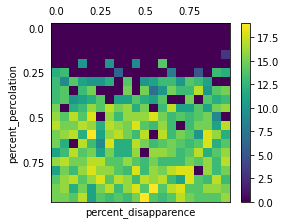

In [ ]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink = 0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom = False,
                left = False,
                right = False,
                top = False)

plt.show()

#전파확률이 25%를 넘지 못하면 거의 전파되지 않음

##076. 실제 데이터 불러오기

In [ ]:
# 스포츠 센터 회원 전체 데이터로 시뮬레이션

df_mem_links = pd.read_csv('/content/gdrive/MyDrive/파이썬 데이터분석/pyda100-master/8장/links_members.csv')
df_mem_info = pd.read_csv('/content/gdrive/MyDrive/파이썬 데이터분석/pyda100-master/8장/info_members.csv')

In [ ]:
df_mem_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_mem_info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##077. 링크 수의 분포 가시화

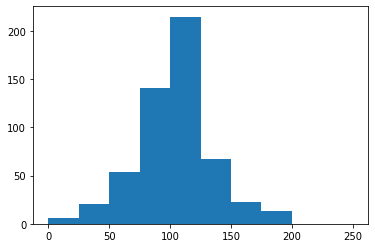

In [ ]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
  array_linkNum[i] = sum(df_mem_links["Node" + str(i)])

plt.hist(array_linkNum, bins = 10, range = (0, 250))
plt.show()

# 이 분포는 거의 모든 노드가 어느정도의 링크 수를 가지고 있기 때문에
# 입소문이 급격히 퍼지지는 않지만 허브(연결을 많이 가지는 소수의 사람)에 의존하지 않고 입소문이 퍼지기 쉬움

##078. 시뮬레이션을 위해 실제 데이터로 파라미터 추정

In [ ]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns)-1
# 소멸 확률 추정 
count_active = 0
count_active_to_inactive = 0
for t in range(1,T_NUM):    #df_mem_info의 column 순서대로, 즉 시계열순으로 확인
    for i in range(NUM):
        if (df_mem_info.iloc[i][t]==1):       # 어떤 고객 i가 t번째 월에 이용을 했다면
            count_active_to_inactive += 1     
            if (df_mem_info.iloc[i][t+1]==0): # 어떤 고객 i가 t+1번째 월에는 이용을 안 했다면
                count_active += 1
estimated_percent_disapparence = count_active/count_active_to_inactive  # 소멸 확률 = t번째 월 이용 후 t+1번째 월 이용 안함 / t번째 월 이용함
                                                                        # 즉 활성(1) -> 비활성(0) 비율

In [ ]:
# 확산 확률 추정
count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM-1):
    df_link_t = df_mem_info[df_mem_info[str(t)]==1]   # t번째 달에 이용한 모든 고객 데이터 추출
    temp_flag_count = np.zeros(NUM)                 # 고객 수 만큼 영배열 생성

    for i in range(len(df_link_t.index)):
        df_link_temp = df_mem_links[df_mem_links["Node"+str(df_link_t.index[i])]==1]  # t번째 달 이용한 i번째 고객(Node i)의 다른 Node와의 연결 여부 열 추출
        for j in range(len(df_link_temp.index)):
            if (df_mem_info.iloc[df_link_temp.index[j]][t]==0):         # Node i의 Node j와의 연결 여부 0 or 1 -> df_mem_info.iloc[0 or 1][t] == 0
                if (temp_flag_count[df_link_temp.index[j]]==0):         # Node i의 Node j와의 연결 여부 0 or 1 -> temp_flag_count[0 or 1] == 0
                    count_link += 1
                if (df_mem_info.iloc[df_link_temp.index[j]][t+1]==1):   # Node i의 Node j와의 연결 여부 0 or 1 -> df_mem_info.iloc[0 or 1][t] == 1
                    if (temp_flag_count[df_link_temp.index[j]]==0):     # Node i의 Node j와의 연결 여부 0 or 1 -> temp_flag_count[0 or 1] == 0
                        temp_flag_count[df_link_temp.index[j]] = 1      #                                      -> temp_flag_count[0 or 1] = 1로 바꿔 줌
                        count_link_to_active += 1
estimated_percent_percolation = count_link_to_active/count_link

# 비활성(0) -> 활성(1)
# 링크 개수와 관계없이 변화가 발생하므로 중복 없이 세야함

In [ ]:
print(estimated_percent_disapparence)
print(estimated_percent_percolation)

0.10147163541419416
0.025184661323275185


##079. 실제 데이터와 시뮬레이션 비교

In [ ]:
percent_disapparence = estimated_percent_disapparence
percent_percolation = estimated_percent_percolation
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []

for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparance, df_mem_links)
  list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

In [ ]:
T_NUM = len(df_mem_info.columns) - 1
list_timeSeries_num_real = []
for i in range(0, T_NUM):
  list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)] == 1].index))

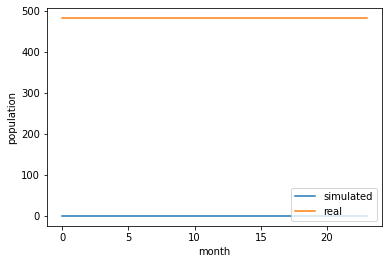

In [ ]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc = 'lower right')
plt.show()

##080. 시뮬레이션으로 미래 예측

In [ ]:
percent_disapparence = estimated_percent_disapparence
percent_percolation = estimated_percent_percolation
T_NUM = 36
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []

for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparance, df_mem_links)
  list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

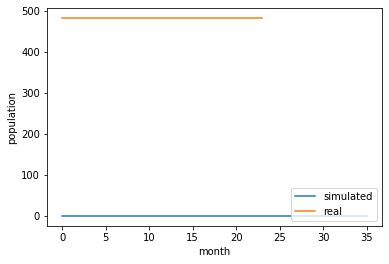

In [ ]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
#????